# Simple Credit Card Clustring

### BY : Hossam Medhat Shokry


## Step 1: Import Libraries


In [18]:
# Import the tools we need
import pandas as pd                # For working with data tables
import numpy as np                 # For math operations
import matplotlib.pyplot as plt    # For making charts
import seaborn as sns              # For pretty charts
from sklearn.cluster import KMeans # For grouping customers
from sklearn.preprocessing import StandardScaler # For preparing data
import warnings
warnings.filterwarnings('ignore')  # Hide warning messages

# Make our charts look nice
plt.style.use('default')
sns.set_palette("husl")

print("All libraries loaded successfully!")

All libraries loaded successfully!


## Step 2: Load Our Data


In [19]:
# Load the credit card data
data = pd.read_csv("CC GENERAL.csv")

print(f"We have data for {len(data)} customers!")
print(f"Each customer has {len(data.columns)} different pieces of information")

# Look at the first 5 customers
print("\nFirst 5 customers:")
data.head()

We have data for 8950 customers!
Each customer has 18 different pieces of information

First 5 customers:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Step 3: Understand Our Data


In [20]:
# Remove the customer ID (we don't need it for grouping)
data = data.drop('CUST_ID', axis=1)

# Get basic information about our data
print("Basic Information:")
print(f"Number of customers: {len(data)}")
print(f"Number of features: {len(data.columns)}")

# Show column names
print("\nWhat information do we have about each customer?")
for i, col in enumerate(data.columns, 1):
    print(f"{i:2d}. {col}")

Basic Information:
Number of customers: 8950
Number of features: 17

What information do we have about each customer?
 1. BALANCE
 2. BALANCE_FREQUENCY
 3. PURCHASES
 4. ONEOFF_PURCHASES
 5. INSTALLMENTS_PURCHASES
 6. CASH_ADVANCE
 7. PURCHASES_FREQUENCY
 8. ONEOFF_PURCHASES_FREQUENCY
 9. PURCHASES_INSTALLMENTS_FREQUENCY
10. CASH_ADVANCE_FREQUENCY
11. CASH_ADVANCE_TRX
12. PURCHASES_TRX
13. CREDIT_LIMIT
14. PAYMENTS
15. MINIMUM_PAYMENTS
16. PRC_FULL_PAYMENT
17. TENURE


In [35]:

data.describe().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Customer_Group
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.28,1733.14,844.91,0.15,11.52,1.32
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.65,2895.06,2332.79,0.29,1.34,0.71
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00,0.00
25%,128.28,0.89,39.64,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,170.86,0.00,12.00,1.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00,1.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,788.71,0.14,12.00,2.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00,3.00


## Step 4: Clean Our Data


In [22]:
# Check for missing data
missing_data = data.isnull().sum()
print("Missing Data Check:")
print(missing_data[missing_data > 0])

# Fill missing values with average (median)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

print("\nMissing data fixed!")
print(f"Now we have {data.isnull().sum().sum()} missing values (should be 0)")

Missing Data Check:
CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

Missing data fixed!
Now we have 0 missing values (should be 0)


## Step 5: Simple Data Visualization


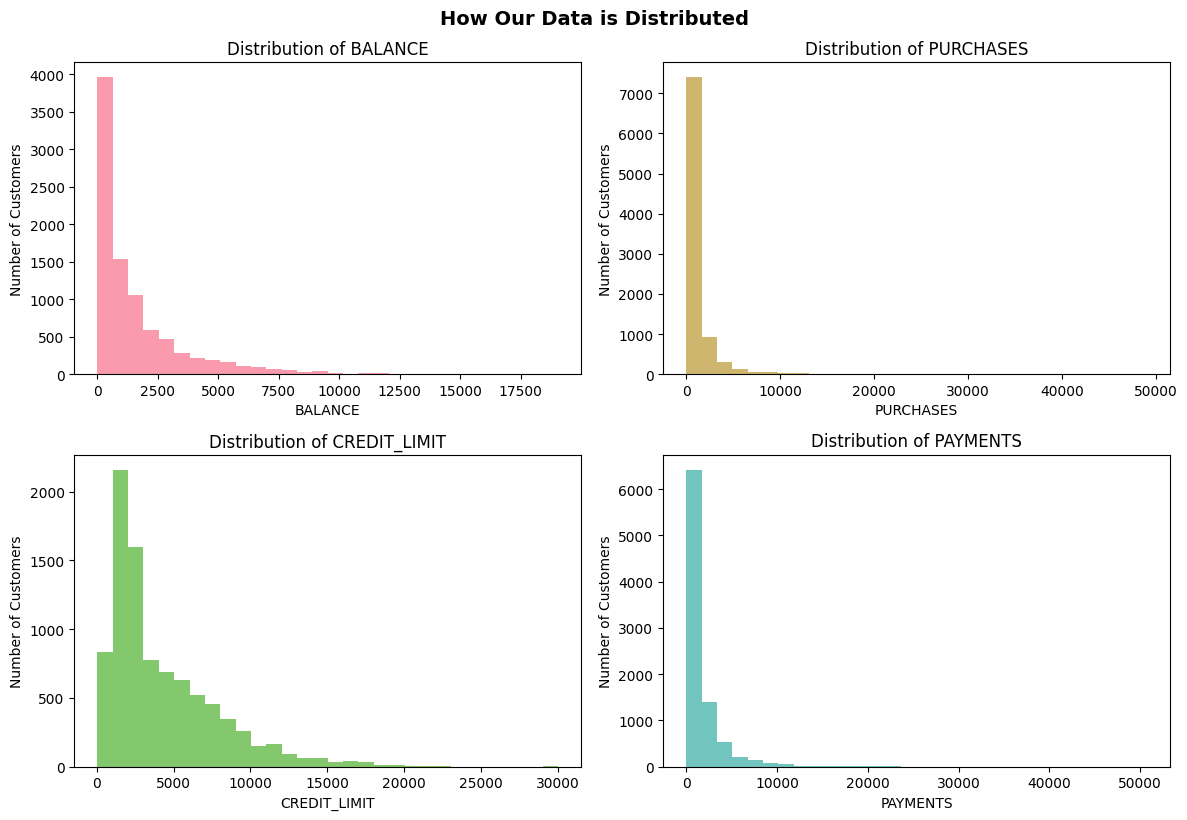

In [23]:
# Let's look at some key variables
key_variables = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']

# Create histograms to see data distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(key_variables):
    axes[i].hist(data[var], bins=30, alpha=0.7, color=sns.color_palette("husl")[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Number of Customers')

plt.tight_layout()
plt.suptitle('How Our Data is Distributed', y=1.02, fontsize=14, fontweight='bold')
plt.show()

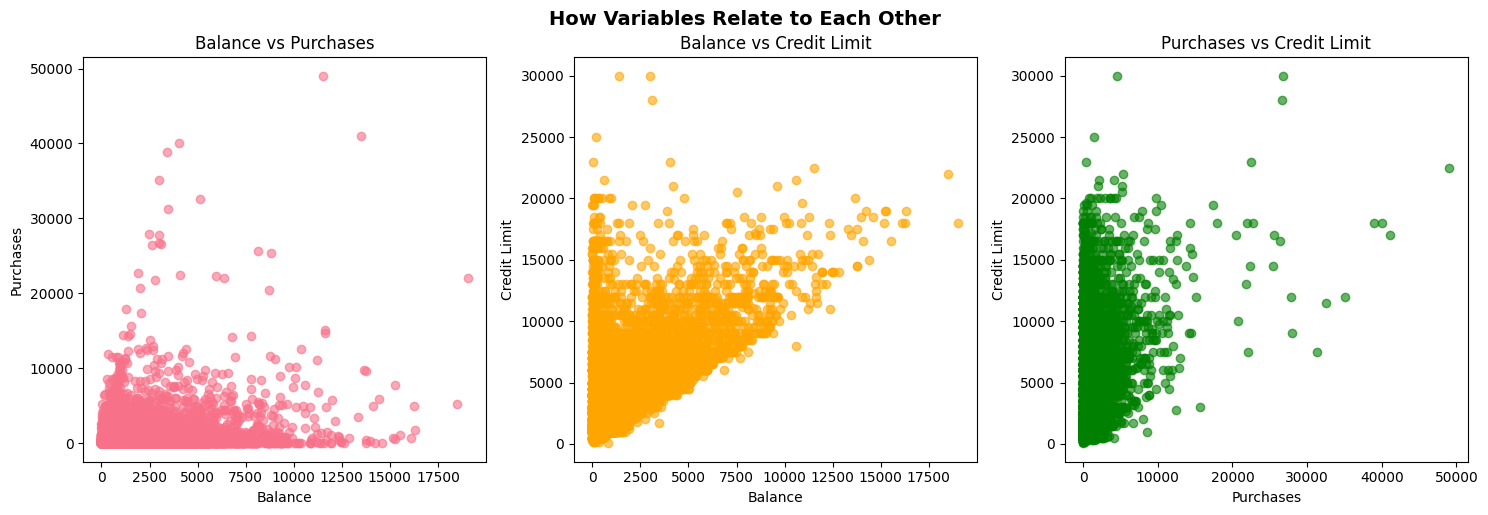

In [24]:
# Simple scatter plots to see relationships
plt.figure(figsize=(15, 5))

# Plot 1: Balance vs Purchases
plt.subplot(1, 3, 1)
plt.scatter(data['BALANCE'], data['PURCHASES'], alpha=0.6)
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.title('Balance vs Purchases')

# Plot 2: Balance vs Credit Limit
plt.subplot(1, 3, 2)
plt.scatter(data['BALANCE'], data['CREDIT_LIMIT'], alpha=0.6, color='orange')
plt.xlabel('Balance')
plt.ylabel('Credit Limit')
plt.title('Balance vs Credit Limit')

# Plot 3: Purchases vs Credit Limit
plt.subplot(1, 3, 3)
plt.scatter(data['PURCHASES'], data['CREDIT_LIMIT'], alpha=0.6, color='green')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.title('Purchases vs Credit Limit')

plt.tight_layout()
plt.suptitle('How Variables Relate to Each Other', y=1.02, fontsize=14, fontweight='bold')
plt.show()

## Step 6: Prepare Data for Clustering


In [25]:
# Select the most important features for clustering
important_features = [
    'BALANCE',           # How much money they owe
    'PURCHASES',         # How much they buy
    'CREDIT_LIMIT',      # Their credit limit
    'PAYMENTS',          # How much they pay
    'CASH_ADVANCE',      # Cash advances they take
    'PURCHASES_FREQUENCY'  # How often they make purchases
]

# Create our dataset for clustering
cluster_data = data[important_features].copy()

print(f"Selected {len(important_features)} features for clustering:")
for i, feature in enumerate(important_features, 1):
    print(f"{i}. {feature}")

print(f"\nOur clustering dataset shape: {cluster_data.shape}")

Selected 6 features for clustering:
1. BALANCE
2. PURCHASES
3. CREDIT_LIMIT
4. PAYMENTS
5. CASH_ADVANCE
6. PURCHASES_FREQUENCY

Our clustering dataset shape: (8950, 6)


In [26]:
# Standardize the data (make all features have similar scales)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

print("Data has been standardized!")
print("This means all features now have similar importance for clustering.")

# Show before and after scaling
print("\nBefore scaling (original averages):")
print(cluster_data.mean().round(2))

print("\nAfter scaling (should be close to 0):")
scaled_df = pd.DataFrame(scaled_data, columns=important_features)
print(scaled_df.mean().round(3))

Data has been standardized!
This means all features now have similar importance for clustering.

Before scaling (original averages):
BALANCE                1564.47
PURCHASES              1003.20
CREDIT_LIMIT           4494.28
PAYMENTS               1733.14
CASH_ADVANCE            978.87
PURCHASES_FREQUENCY       0.49
dtype: float64

After scaling (should be close to 0):
BALANCE               -0.0
PURCHASES              0.0
CREDIT_LIMIT           0.0
PAYMENTS              -0.0
CASH_ADVANCE          -0.0
PURCHASES_FREQUENCY    0.0
dtype: float64


## Step 7: Find the Best Number of Groups


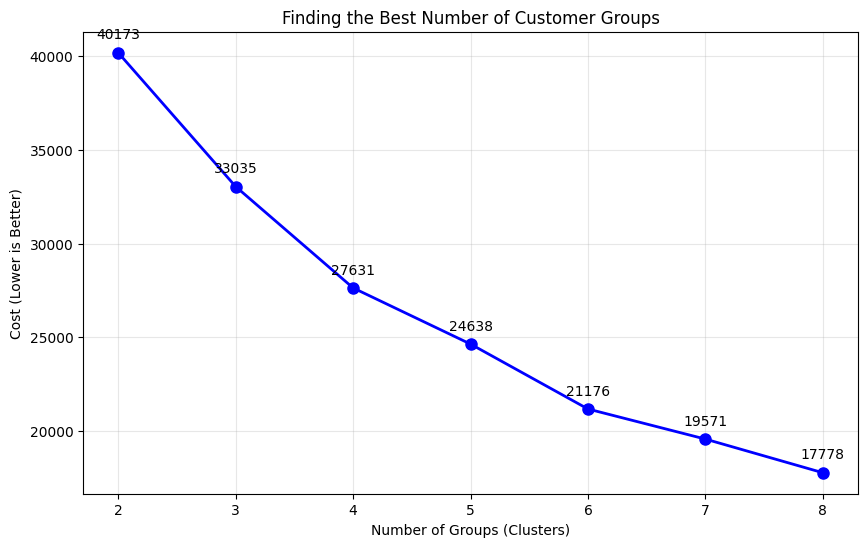

Look for the 'elbow' in the curve - that's usually the best number of groups!
Based on the curve, 4 or 5 groups might be optimal.


In [27]:
# Test different numbers of groups (2 to 8)
possible_clusters = range(2, 9)
costs = []

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    costs.append(kmeans.inertia_)  # This measures how tight the groups are

# Plot the "elbow curve" to find the best number
plt.figure(figsize=(10, 6))
plt.plot(possible_clusters, costs, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Groups (Clusters)')
plt.ylabel('Cost (Lower is Better)')
plt.title('Finding the Best Number of Customer Groups')
plt.grid(True, alpha=0.3)

# Add annotations
for i, cost in enumerate(costs):
    plt.annotate(f'{cost:.0f}', (possible_clusters[i], cost), 
                textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

print("Look for the 'elbow' in the curve - that's usually the best number of groups!")
print("Based on the curve, 4 or 5 groups might be optimal.")

## Step 8: Create Customer Groups


In [28]:
# Let's use 4 groups (you can change this number)
n_clusters = 4

# Create the clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_groups = kmeans.fit_predict(scaled_data)

# Add the group labels to our original data
data['Customer_Group'] = customer_groups

print(f"Successfully created {n_clusters} customer groups!")

# Count customers in each group
group_counts = pd.Series(customer_groups).value_counts().sort_index()
print("\nCustomers in each group:")
for group, count in group_counts.items():
    percentage = (count / len(data)) * 100
    print(f"Group {group}: {count} customers ({percentage:.1f}%)")

Successfully created 4 customer groups!

Customers in each group:
Group 0: 1143 customers (12.8%)
Group 1: 3930 customers (43.9%)
Group 2: 3731 customers (41.7%)
Group 3: 146 customers (1.6%)


## Step 9: Visualize Our Customer Groups


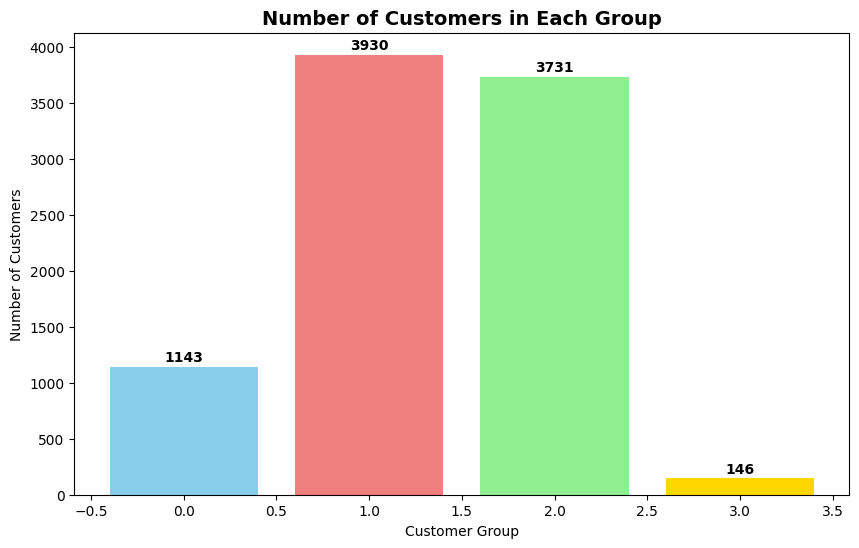

In [29]:
# 1. Bar chart showing group sizes
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
bars = plt.bar(group_counts.index, group_counts.values, color=colors)

plt.title('Number of Customers in Each Group', fontsize=14, fontweight='bold')
plt.xlabel('Customer Group')
plt.ylabel('Number of Customers')

# Add value labels on bars
for bar, count in zip(bars, group_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.show()

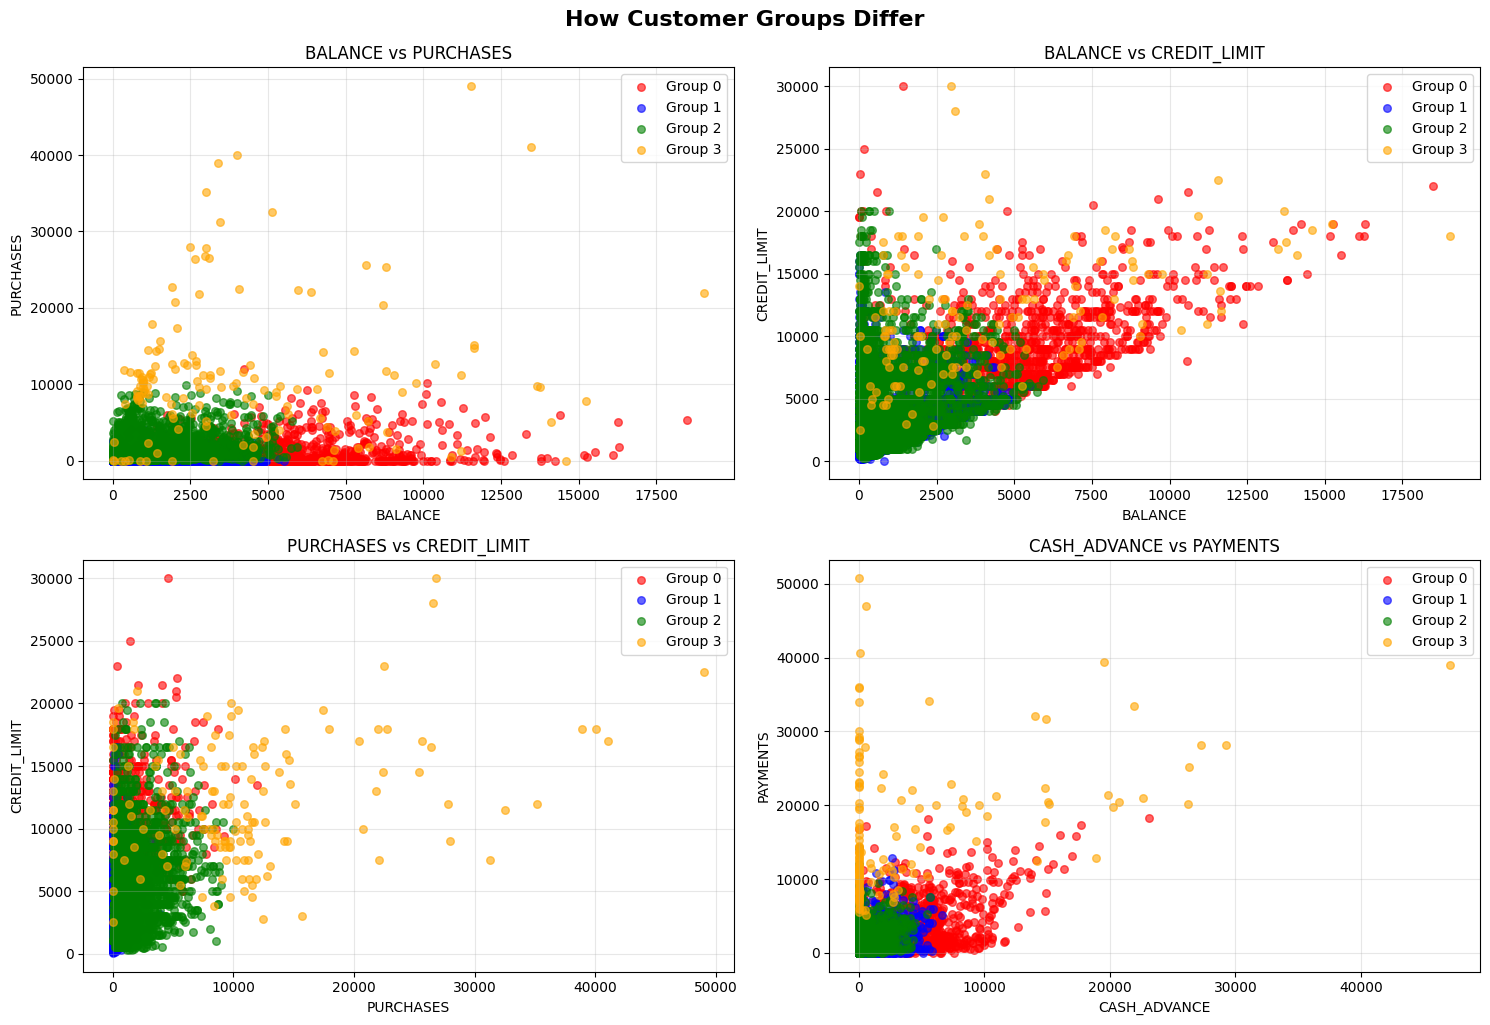

In [30]:
# 2. Scatter plots showing how groups differ
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
colors = ['red', 'blue', 'green', 'orange']

# Different comparisons
comparisons = [
    ('BALANCE', 'PURCHASES'),
    ('BALANCE', 'CREDIT_LIMIT'),
    ('PURCHASES', 'CREDIT_LIMIT'),
    ('CASH_ADVANCE', 'PAYMENTS')
]

for i, (x_var, y_var) in enumerate(comparisons):
    ax = axes[i//2, i%2]
    
    for group in range(n_clusters):
        group_data = data[data['Customer_Group'] == group]
        ax.scatter(group_data[x_var], group_data[y_var], 
                  c=colors[group], alpha=0.6, s=30, 
                  label=f'Group {group}')
    
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_title(f'{x_var} vs {y_var}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('How Customer Groups Differ', y=1.02, fontsize=16, fontweight='bold')
plt.show()

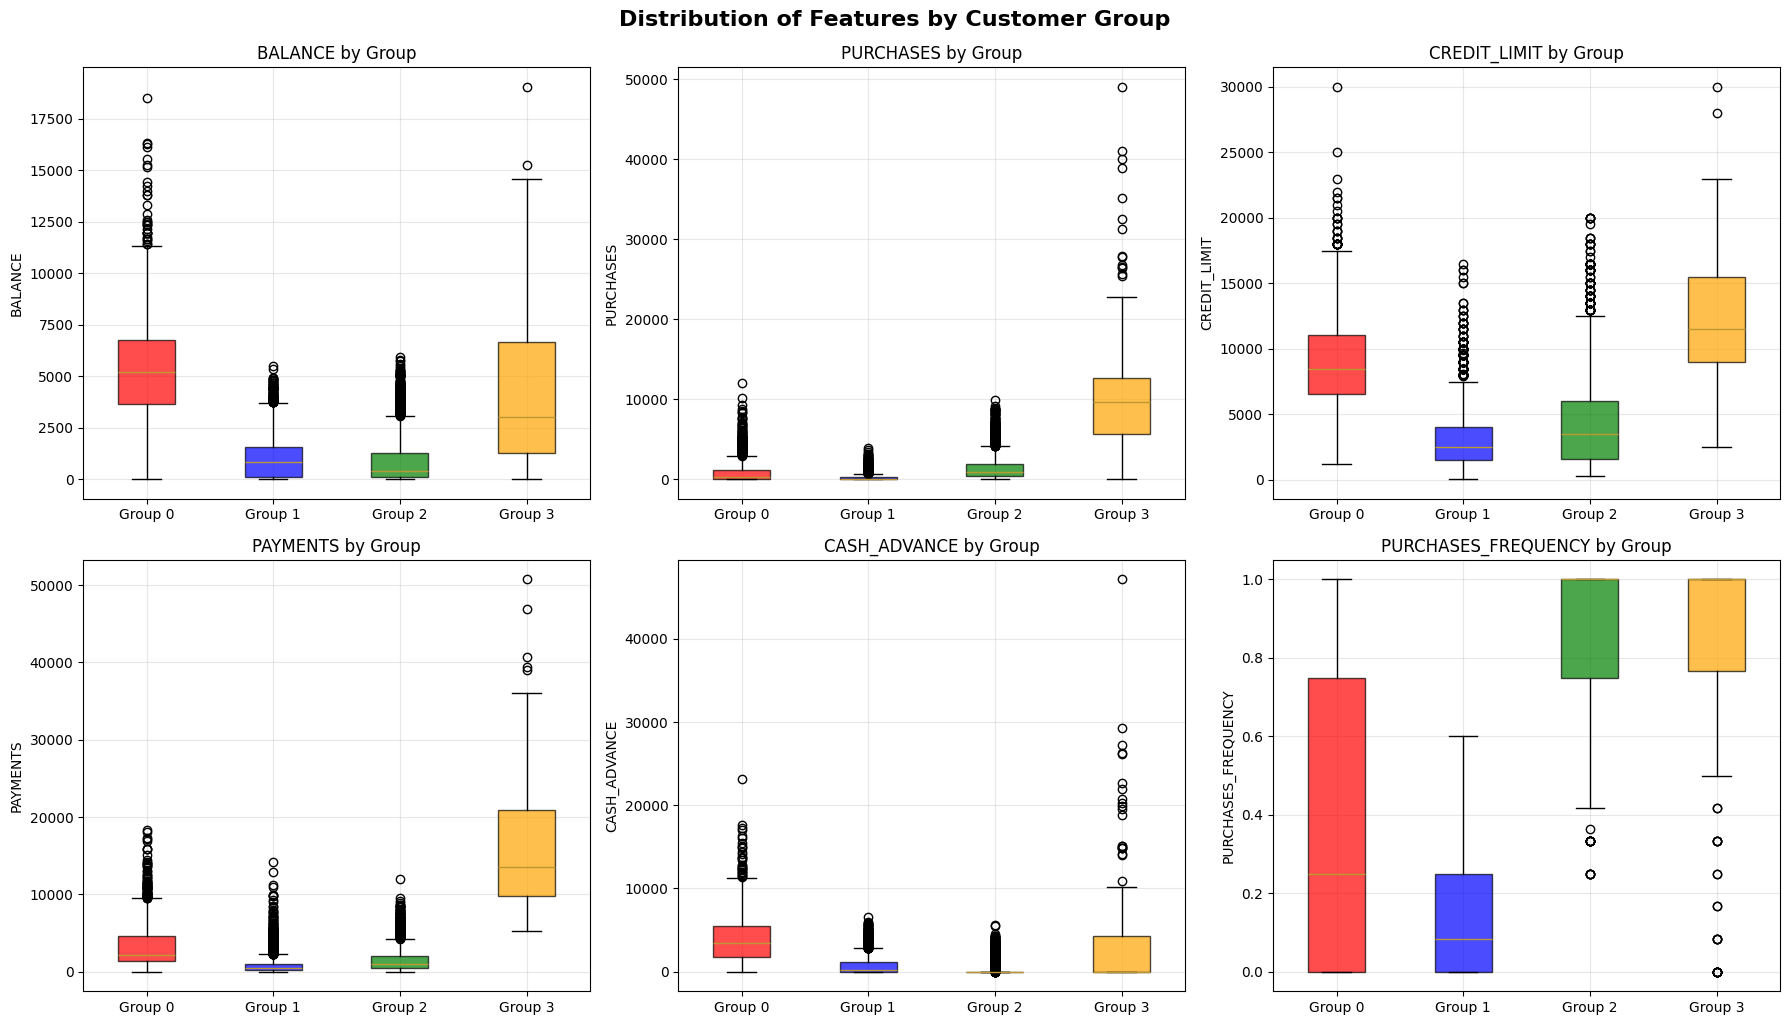

In [31]:
# 3. Box plots showing the distribution of key variables by group
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(important_features):
    # Create data for each group
    group_data = [data[data['Customer_Group'] == group][var] for group in range(n_clusters)]
    
    # Create box plot
    box_plot = axes[i].boxplot(group_data, patch_artist=True,
                              labels=[f'Group {g}' for g in range(n_clusters)])
    
    # Color the boxes
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[i].set_title(f'{var} by Group')
    axes[i].set_ylabel(var)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribution of Features by Customer Group', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## Step 10: Understand Each Customer Group


In [32]:
# Calculate average values for each group
group_summary = data.groupby('Customer_Group')[important_features].mean().round(2)

print("CUSTOMER GROUP CHARACTERISTICS")
print("=" * 50)

# Create simple descriptions for each group
group_descriptions = {
    0: "Low Activity Customers",
    1: "Regular Shoppers", 
    2: "High Value Customers",
    3: "Cash Advance Users"
}

for group in range(n_clusters):
    print(f"\n{group_descriptions.get(group, f'Group {group}')}")
    print("-" * 30)
    group_data = group_summary.loc[group]
    
    print(f"Average Balance: ${group_data['BALANCE']:,.2f}")
    print(f"Average Purchases: ${group_data['PURCHASES']:,.2f}")
    print(f"Average Credit Limit: ${group_data['CREDIT_LIMIT']:,.2f}")
    print(f"Average Payments: ${group_data['PAYMENTS']:,.2f}")
    print(f"Average Cash Advance: ${group_data['CASH_ADVANCE']:,.2f}")
    print(f"Purchase Frequency: {group_data['PURCHASES_FREQUENCY']:.2f}")
    print(f"Number of customers: {group_counts[group]}")

print("\n" + "=" * 50)
print("SUMMARY TABLE")
print("=" * 50)
print(group_summary)

CUSTOMER GROUP CHARACTERISTICS

Low Activity Customers
------------------------------
Average Balance: $5,381.77
Average Purchases: $970.22
Average Credit Limit: $9,228.44
Average Payments: $3,442.30
Average Cash Advance: $3,959.24
Purchase Frequency: 0.37
Number of customers: 1143

Regular Shoppers
------------------------------
Average Balance: $1,017.39
Average Purchases: $226.73
Average Credit Limit: $2,998.12
Average Payments: $922.70
Average Cash Advance: $714.64
Purchase Frequency: 0.15
Number of customers: 3930

High Value Customers
------------------------------
Average Balance: $861.62
Average Purchases: $1,439.77
Average Credit Limit: $4,322.05
Average Payments: $1,484.56
Average Cash Advance: $226.49
Purchase Frequency: 0.87
Number of customers: 3731

Cash Advance Users
------------------------------
Average Balance: $4,367.26
Average Purchases: $11,005.87
Average Credit Limit: $12,106.51
Average Payments: $16,520.63
Average Cash Advance: $3,985.60
Purchase Frequency: 0.81


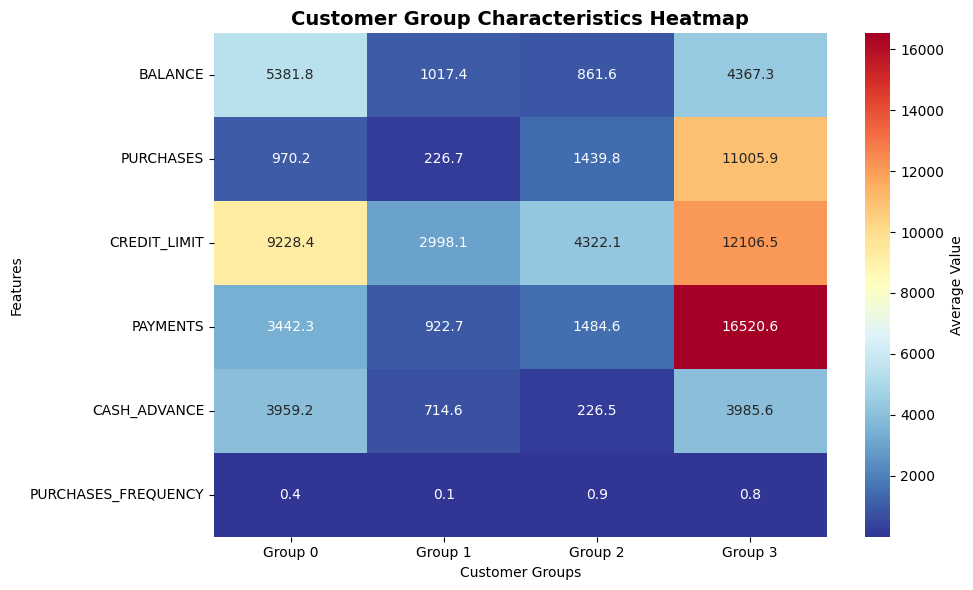

In this heatmap:
   Red = Higher values
   Blue = Lower values
   Yellow = Medium values


In [33]:
# Create a simple heatmap to visualize group differences
plt.figure(figsize=(10, 6))
sns.heatmap(group_summary.T, annot=True, cmap='RdYlBu_r', fmt='.1f',
            xticklabels=[f'Group {i}' for i in range(n_clusters)],
            cbar_kws={'label': 'Average Value'})

plt.title('Customer Group Characteristics Heatmap', fontsize=14, fontweight='bold')
plt.ylabel('Features')
plt.xlabel('Customer Groups')
plt.tight_layout()
plt.show()

print("In this heatmap:")
print("   Red = Higher values")
print("   Blue = Lower values")
print("   Yellow = Medium values")

## Step 11: Business Insights


In [34]:
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

insights = {
    0: {
        'title': "Low Activity Customers",
        'description': "These customers have low balances and don't use their cards much.",
        'recommendation': "Offer incentives to increase card usage, like cashback rewards."
    },
    1: {
        'title': "Regular Shoppers", 
        'description': "These customers make regular purchases with moderate spending.",
        'recommendation': "Provide loyalty programs and spending-based rewards."
    },
    2: {
        'title': "High Value Customers",
        'description': "These customers have high credit limits and make large purchases.",
        'recommendation': "Offer premium services and exclusive benefits."
    },
    3: {
        'title': "Cash Advance Users",
        'description': "These customers frequently use cash advances.",
        'recommendation': "Monitor for financial stress, offer financial counseling services."
    }
}

for group in range(n_clusters):
    if group in insights:
        info = insights[group]
        print(f"\n{info['title']}")
        print(f"Size: {group_counts[group]} customers ({(group_counts[group]/len(data)*100):.1f}%)")
        print(f"Description: {info['description']}")
        print(f"Recommendation: {info['recommendation']}")
        print("-" * 40)

print("\nKEY TAKEAWAYS:")
print("• Different customer groups have very different behaviors")
print("• Each group needs a different marketing approach")
print("• This analysis can help increase customer satisfaction and profits")
print("• Regular monitoring of these groups is important for business success")

BUSINESS INSIGHTS & RECOMMENDATIONS

Low Activity Customers
Size: 1143 customers (12.8%)
Description: These customers have low balances and don't use their cards much.
Recommendation: Offer incentives to increase card usage, like cashback rewards.
----------------------------------------

Regular Shoppers
Size: 3930 customers (43.9%)
Description: These customers make regular purchases with moderate spending.
Recommendation: Provide loyalty programs and spending-based rewards.
----------------------------------------

High Value Customers
Size: 3731 customers (41.7%)
Description: These customers have high credit limits and make large purchases.
Recommendation: Offer premium services and exclusive benefits.
----------------------------------------

Cash Advance Users
Size: 146 customers (1.6%)
Description: These customers frequently use cash advances.
Recommendation: Monitor for financial stress, offer financial counseling services.
----------------------------------------

KEY TAKEAWAYS

### BY : Hossam Medhat Shokry
